# Image processing project (lane lines Detection)

# We are:

#17t0346_احمد جابر عبد العزيز موسى

#16W0015_حسين عبد الملك علي قاسم العبسي

#17E0020_خالد احمد محمد عبد العزيز

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from IPython.display import HTML, Video,Image
from moviepy.editor import VideoFileClip
from PerspectiveTransformation import *
from LaneLines import *
from docopt import docopt
from CameraCalibration import CameraCalibration
from Thresholding import *

In [23]:
class FindLaneLines:
    """ This class is for parameter tunning.

    Attributes:
        ...
    """
    def __init__(self):
        """ Init Application"""
        self.calibration = CameraCalibration('camera_cal', 9, 6)
        self.thresholding = Thresholding()
        self.transform = PerspectiveTransformation()
        self.lanelines = LaneLines()

    def forward(self, img):
        out_img = np.copy(img)
        img = self.calibration.undistort(img)
        img = self.transform.forward(img)
        img = self.thresholding.forward(img)
        img = self.lanelines.forward(img)
        img = self.transform.backward(img)

        out_img = cv2.addWeighted(out_img, 1, img, 0.6, 0)
        out_img = self.lanelines.plot(out_img)
        return out_img

    def process_image(self, input_path, output_path):
        img = mpimg.imread(input_path)
        out_img = self.forward(img)
        mpimg.imsave(output_path, out_img)

    def process_video(self, input_path, output_path):
        clip = VideoFileClip(input_path)
        out_clip = clip.fl_image(self.forward)
        out_clip.write_videofile(output_path, audio=False,fps=20,preset = 'ultrafast',logger='bar')

# Frame Working Steps
#1 Camera Calibration

#2 Transforming-forward

#3 Thresholding

#4 lane line detection

#5 Transforming-backward

#6 Applying result to original frame


# Original Frame 

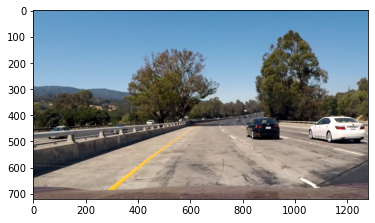

In [24]:
test_img = mpimg.imread('test_images/test1.jpg')
Final_img = np.copy(test_img)
plt.imshow(test_img)

# 1,2 - Calibrating camera & transforming-forward

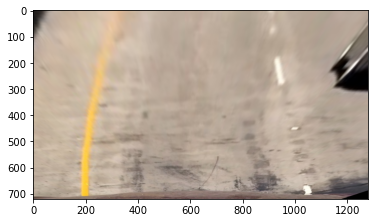

In [25]:
calibration = CameraCalibration('camera_cal', 9, 6)
test= calibration.undistort(test_img)
transform = PerspectiveTransformation()
test = transform.forward(test)
plt.imshow(test)

# 3 - Thresholding

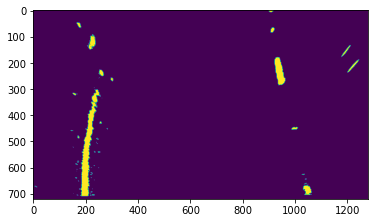

In [26]:
thresholding = Thresholding()
test = thresholding.forward(test)
plt.imshow(test)

# 4 - Lane Line detection

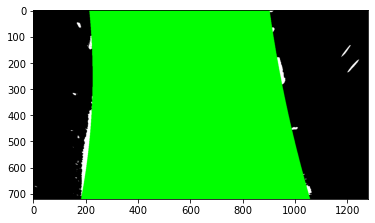

In [27]:
lanelines = LaneLines()
test = lanelines.forward(test)
plt.imshow(test)

# 5 - Transforming-backward

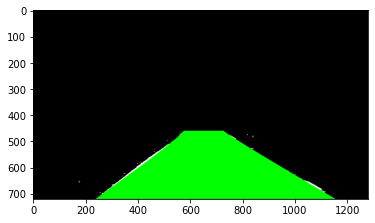

In [28]:
test = transform.backward(test)
plt.imshow(test)

# 6 - Final result

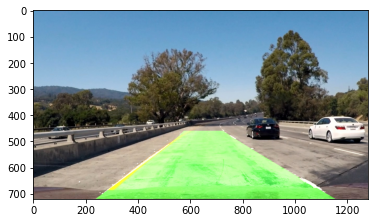

In [29]:
Final_img = cv2.addWeighted(Final_img, 1, test, 0.6, 0)
plt.imshow(Final_img)

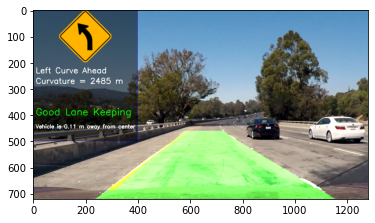

In [30]:
Final_img = lanelines.plot(Final_img)
plt.imshow(Final_img)

# Testing on Image

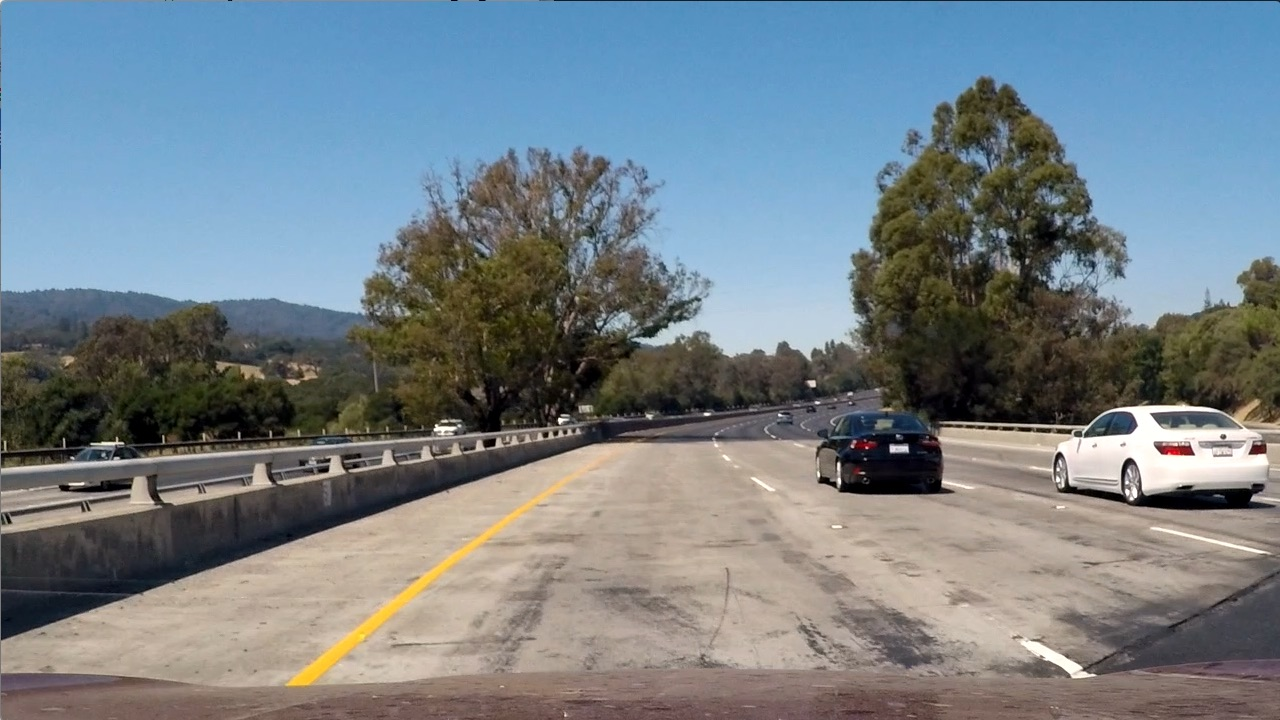

In [31]:
input_path = 'test_images/test1.jpg'
output_path = 'F:/test.jpg'
fll2image = FindLaneLines()
fll2image.process_image(input_path, output_path)
Image(input_path,width=500,height = 500)

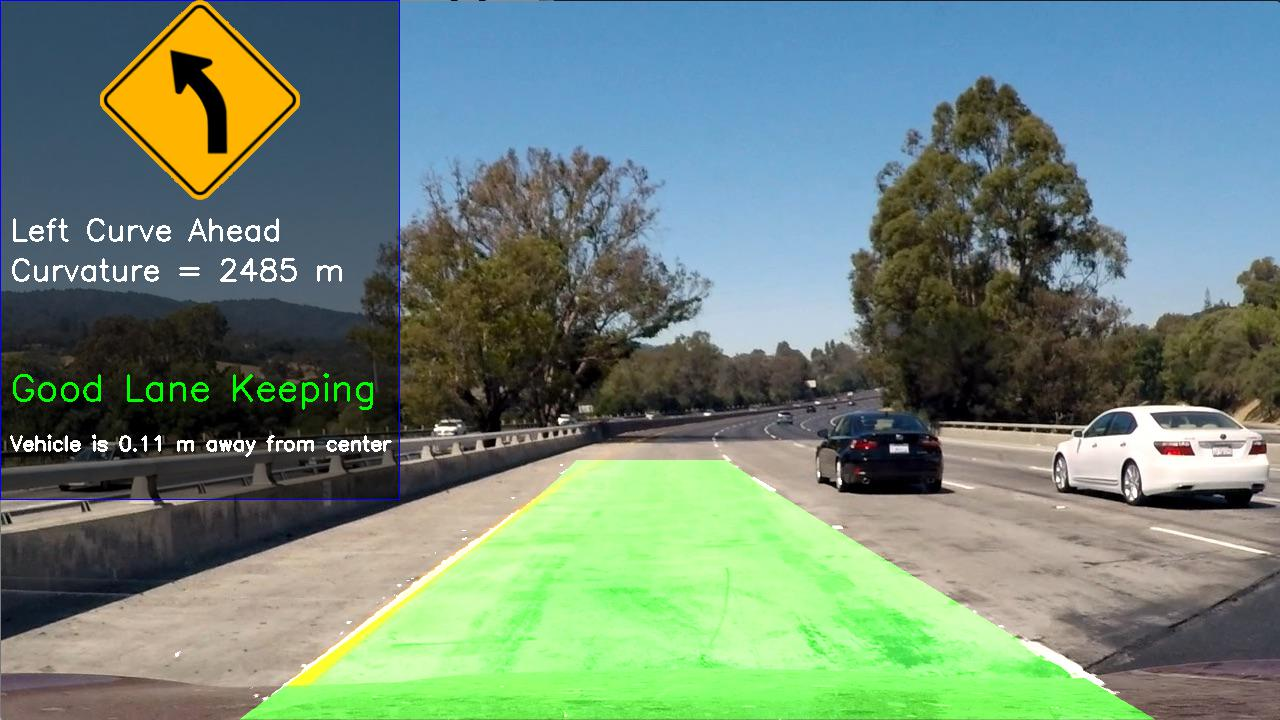

In [32]:
Image(output_path,width=500,height = 500)

# Testing On Video

In [33]:
input_path = 'harder_challenge_video.mp4'
output_path = 'output_videos/'+input_path[:-4]+'_out.mp4'
Video(input_path,width=500,height = 500)

In [34]:
fll2video = FindLaneLines()
fll2video.process_video(input_path, output_path)

KeyboardInterrupt: 

In [ ]:
Video(output_path,width=500,height = 500)

In [ ]:
# Image_processing_Project
# Hello There :)
"""
Lane Lines Detection pipeline
How to use ::
1-run main.py file via anaconda cmd
2-use Jupyter to run Jupyter_notebook.ipynp and edit the input & output pathes as you like

Usage:
    main.py [--video] INPUT_PATH OUTPUT_PATH 

Options:

-h --help                               show this screen
--video                                 process video file instead of image
            
Ex: for single image input
>>python main.py C:/test.jpg D:/out.jpg

Ex: for video input
>>python main.py --video C:/test.mp4 D:/out.mp4                
"""


def main():
    args = docopt(__doc__)
    input = args['INPUT_PATH']
    output = args['OUTPUT_PATH']

    findLaneLines = FindLaneLines()
    if args['-v']:
        findLaneLines.process_video(input, output)
    else:
        findLaneLines.process_image(input, output)


if __name__ == "__Final_main__":
    main()